# Sentinel 5P data interrogation, spatial plotting, basic quality control

    Version: 0.0
    Date: 20/11/2018
    Author: Federico Fierli, EUMETSAT

This aim of this code is to simply import a netCDF file in to your python workspace, understand its content, conduct some basic operations and plot an image. In this case, we will be using a level-2 Sentinel 5P daily overpass, but the script can be easily adapted to plot any netCDF variable.

The first step in any python code is usually to import libraries that you will need. Libraries are usually code modules that perform specific tasks or provide specific capability (e.g. statistical analysis or plotting routines). In this case we will import the netCDF library, the numpy library which will help to conduct various operations on the data, and the matplotlib plotting library to generate some images. We will also import the os library, that allows python access to some command-line-eqsue capability like 'list directory', as well as the python library that governs the reporting of warning (so that we can turn them off here, and make the code run without being so 'noisy').

In [1]:
%matplotlib inline

# libraries are imported here, and we can import any library with an alias that allows us easy access to them later.
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os

Now we will start our script, proper.

We being by seting paths to let python know where our data is stored, and what it is called. If you keep your scripts and files in the same folder, you will not need to set the full path to the data file. However you may want to store things in different places and so it is good practice to be specific. The first line in this box gets us the path where this file is.

In [11]:
input_root    = os.path.join(os.getcwd(),'../tropomi_no2_data')
input_path    = ''
file_name_chl = 'S5P_OFFL_L2__NO2____20181011T090630_20181011T104800_05150_01_010100_20181017T111248.nc'

We read the file using functions from the netCDF4 (alias "nc") library. Note that to use a library in python you use the imported alias followed by a dot, and then the function you want (e.g. nc.Dataset).

In [12]:
S5P_file     =  nc.Dataset(os.path.join(input_root,input_path,file_name_chl), 'r')

You can simply see the content of the dataset with a print instruction.
This lists the variables and methods associated with the S5P_file object. Python is an 'object orientatated' language, which means that all objects have relevant methods associated with them.

In [188]:
#print (S5P_file)

In the last line you see two groups. This where data are. Let'see what is inside them 

In [13]:
print (S5P_file.groups)

OrderedDict([('PRODUCT', <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3245), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixe

Now we know what we have in the products. Extract the basic to produce a map of the nitrogen dioxide total columns. In our case longitude, Latitude and NO2 tropospheric column. We see that this a three indexes array and will explore the meaning later. To extract a variable we should specify what we want - note that [:] extracts only the values stored while we may need some additional information (e.g. units)

In [14]:
lon = S5P_file.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lat = S5P_file.groups['PRODUCT'].variables['latitude'][:][0,:,:]
time_utc= S5P_file.groups['PRODUCT'].variables['time_utc']
no2 = S5P_file.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']
ak = S5P_file.groups['PRODUCT'].variables['averaging_kernel']
layer = S5P_file.groups['PRODUCT'].variables['layer'][:][:]

In [15]:
no2_data=no2[:]
no2_data[no2_data == no2._FillValue] = np.nan

You can look at the variables in your workspace in interactive python 
environments (like this, or ipython) by typing 'whos'. This will tell you the name of the variable, it's type and then information on it, such as its size and shape. 

In [9]:
whos

Variable        Type           Data/Info
----------------------------------------
S5P_file        Dataset        <class 'netCDF4._netCDF4.<...>oups: PRODUCT, METADATA\n
ak              Variable       <class 'netCDF4._netCDF4.<...>245, 450, 34)\nfilling on
file_name_chl   str            S5P_OFFL_L2__NO2____20181<...>010100_20181017T111248.nc
input_path      str            
input_root      str            /tcenas/home/ffierli/Test<...>books/../tropomi_no2_data
lat             MaskedArray    [[-71.87592  -71.90292  -<...>   80.91397   80.89689 ]]
layer           MaskedArray    [ 0  1  2  3  4  5  6  7 <...> 26 27 28 29 30 31 32 33]
lon             MaskedArray    [[-105.28644  -105.55708 <...>56.30104\n  -156.81128 ]]
nc              module         <module 'netCDF4' from '/<...>ges/netCDF4/__init__.py'>
no2             Variable       <class 'netCDF4._netCDF4.<...>1, 3245, 450)\nfilling on
no2_data        MaskedArray    [[[-- -- -- ... -- -- --]<...>[-- -- -- ... -- -- --]]]
np              

Now let's take a look at our data. First check how longitudes and latitudes are distributed. To do so we make a scatter plot. You can select the dimensions to understand what the axis means

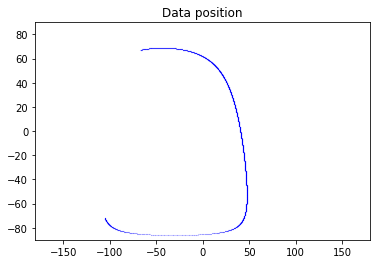

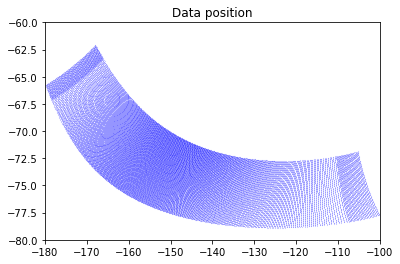

In [16]:
#Index is the orbit

plt.scatter(lon[:,0],lat[:,0],marker='o',c='b',s=0.005,zorder=10)
plt.xlim(-180,180) 
plt.ylim(-90,90)     
plt.title('Data position')
plt.show()

#Index is for the swath. Here the first 101 ...

plt.scatter(lon[0:100,:],lat[0:100,:],marker='o',c='b',s=0.005,zorder=10)
plt.xlim(-180,-100) 
plt.ylim(-80,-60)     
plt.title('Data position')
plt.show()

Visualize the NO2 data along one single swath. A good trick is to subset with indices. By the way, note how to introduce indexes in the plots.

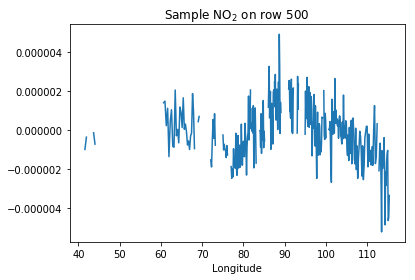

In [194]:
iorb=500
plt.plot(lon[iorb,:],no2_data[0,iorb,:])
plt.title('Sample NO$_2$ on row %d' %iorb)
plt.xlabel('Longitude')
plt.show()

There are negative data - we want to mask them now and, why not, adding the latitude

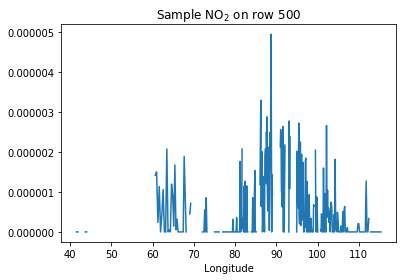

In [195]:
no2_data[no2_data <= 0.] = 1e-9
plt.plot(lon[iorb,:],no2_data[0,iorb,:])
plt.title('Sample NO$_2$ on row %d' %iorb)
plt.xlabel('Longitude')
plt.show()

We subset the dataset. A simple way is to identify indices:

In [17]:
i1=2400
i2=2600

no2_data_resize=no2_data[0,i1:i2,:]
lon_resize=lon[i1:i2,:]
lat_resize=lat[i1:i2,:]

The instruction below just display the content of an array following their indices. 

/tcenas/home/ffierli/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:419: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


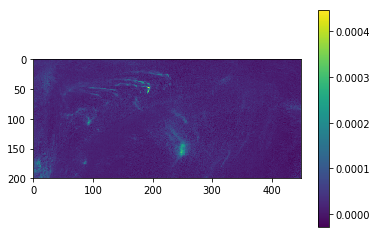

In [18]:
plt.imshow(no2_data_resize)
plt.colorbar()
plt.show()

You will notice a few limitations with displaying plots like this. Firstly - they don't look very pretty (the colour scheme is not ideal and secondly - the axes don't provide any information on the location (other than within the array). Finally the units are unknown. The following procedure is slightly more complex and involves the use of basemap (https://matplotlib.org/basemap/users/examples.html) procedure from matplotlib.

58.90395


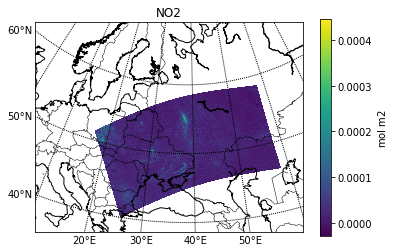

In [19]:
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap

print(np.max(lat_resize))

llcrnrlon=np.min(lon_resize)-5
llcrnrlat=np.min(lat_resize)-5
urcrnrlon=np.max(lon_resize)+20
urcrnrlat=np.max(lat_resize)+5
lon_0=np.mean(lon_resize)
lat_0=np.mean(lat_resize)

# Define a map bounded in the domain using maximum and minimum longitude and latitude
# Center the map on the mean latitude and longitude
# Set the lower left and upper right corner position

m = Basemap(projection='stere',lon_0=lon_0,lat_0=lat_0,lat_ts=lat_0,\
            llcrnrlat=llcrnrlat,llcrnrlon=llcrnrlon,\
            urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,\
            rsphere=6371200.,resolution='l',area_thresh=10000)

xi, yi = m(lon_resize, lat_resize)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2_data_resize))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
plt.colorbar(cs,label='mol m$2$')

# Add Title
plt.title('NO2')
plt.show()

You can also save the figure using the code below (this will save in the folder where you are running the code, if you want to save elsewhere you need to specify the path).


In [1]:
#fig1.savefig('test.png', bbox_inches='tight')